<a href="https://colab.research.google.com/github/Vanisha2005/SCT_DS_4/blob/main/Task_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install -q kagglehub pandas matplotlib seaborn folium


In [42]:
import kagglehub
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")


In [43]:
import os
os.listdir(path)


['US_Accidents_March23.csv']

In [44]:
import os

# Replace with your actual variable if different
print("Files downloaded to:")
print(path)

# List all files in that folder
os.listdir(path)




Files downloaded to:
/kaggle/input/us-accidents


['US_Accidents_March23.csv']

In [45]:
import pandas as pd

# Load only the first 100,000 rows
df = pd.read_csv('/root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv', nrows=100000)

df.shape  # Check number of rows/columns loaded
df.head()




,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [46]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()


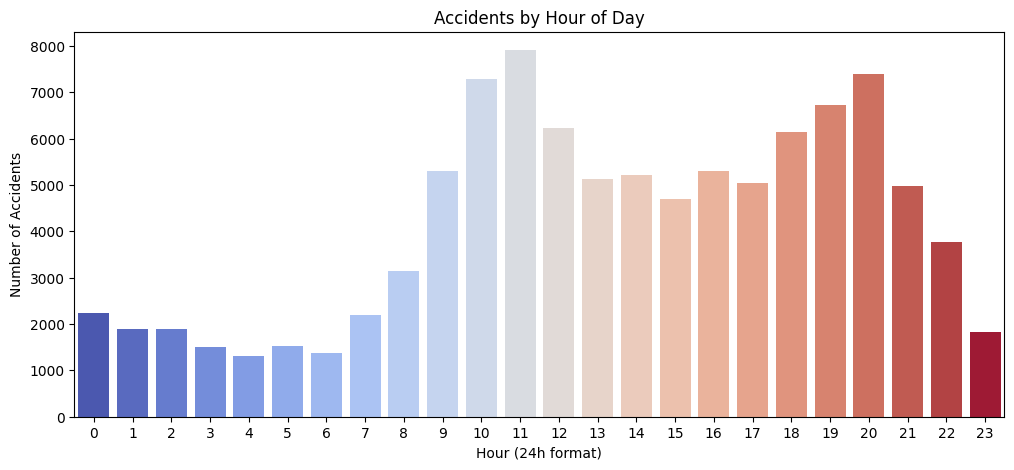

In [47]:
plt.figure(figsize=(12,5))
sns.countplot(x='Hour', data=df, hue='Hour', palette='coolwarm', legend=False)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour (24h format)')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.show()



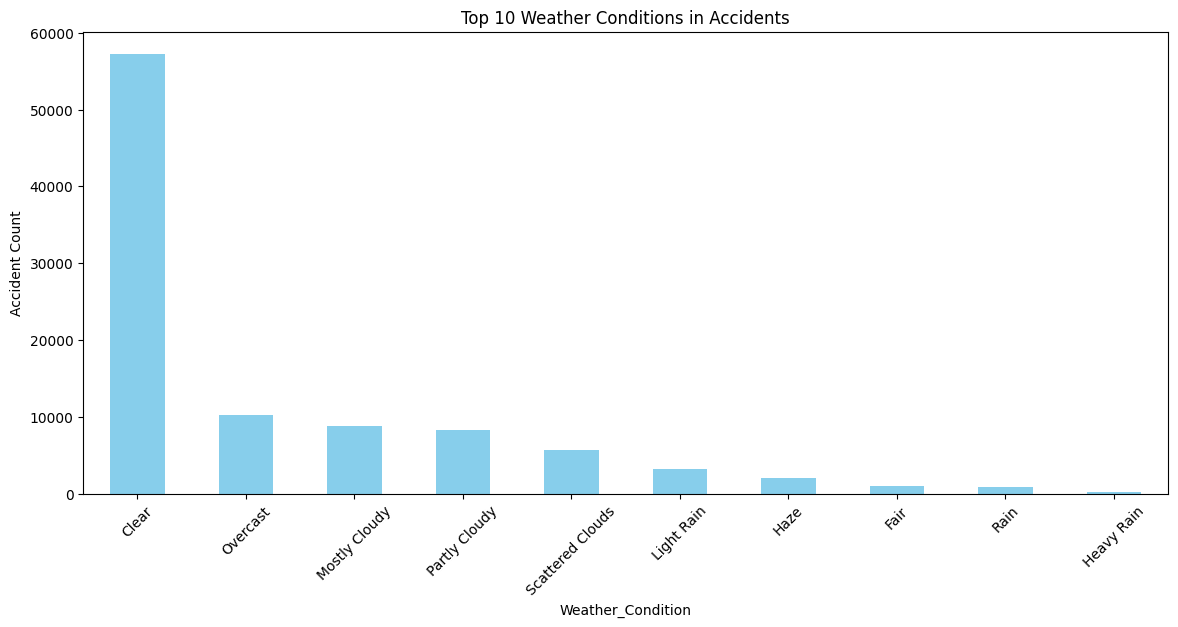

In [48]:
plt.figure(figsize=(14,6))
df['Weather_Condition'].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Weather Conditions in Accidents')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()


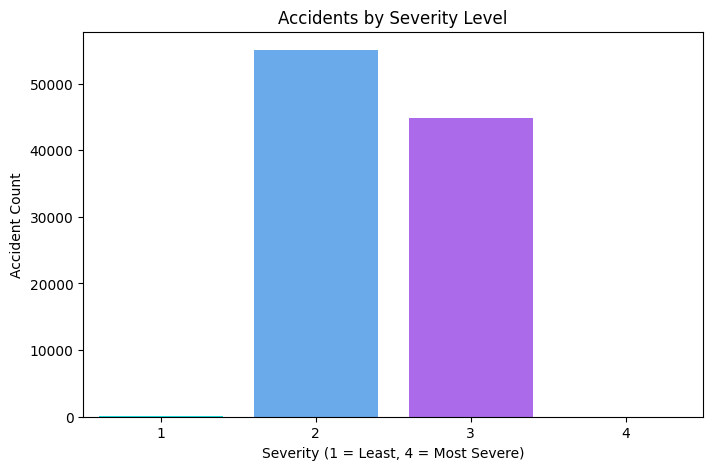

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Severity', data=df, hue='Severity', palette='cool', legend=False)
plt.title('Accidents by Severity Level')
plt.xlabel('Severity (1 = Least, 4 = Most Severe)')
plt.ylabel('Accident Count')
plt.show()

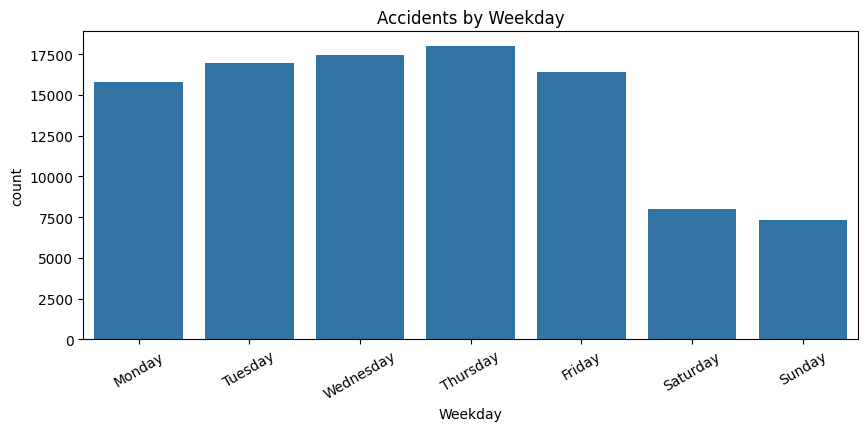

In [50]:
plt.figure(figsize=(10,4))
sns.countplot(x='Weekday', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Accidents by Weekday')
plt.xticks(rotation=30)
plt.show()


In [51]:
import folium
from folium.plugins import HeatMap

df_map = df[['Start_Lat', 'Start_Lng']].dropna().sample(1000)

m = folium.Map(location=[39.5, -98.35], zoom_start=4)
HeatMap(data=df_map).add_to(m)
m


In [52]:
m.save('accident_heatmap.html')


Task 4: US Accidents Analysis

A sample of 100,000 records from the US Accidents (March 2023) dataset was analyzed. Peak accident times were observed during 7–9 AM and 4–6 PM, aligning with commuting hours.Severity ranges from 1 (least severe) to 4 (most severe).Most accidents fall under severity level 2 and 3, indicating moderate impact events. Rain and fog were among the top weather contributors. Most accidents occurred on the right side of the road. Weekdays showed higher accident frequency. A heatmap revealed hotspots in California, Florida, and Texas.

📊 Insights from this data can guide traffic safety improvements.